Importation des packages et déclaration des variables:

In [54]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
from pandas import DataFrame
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

data_X = pd.read_csv('Data_X.csv')
data_Y = pd.read_csv('Data_Y.csv')
new_X = pd.read_csv('DataNew_X.csv')

Remplacer les valeurs de DE et FR dans la colonne "country" pour qu'elles soient utilisables:

In [55]:
for i in range(0, len(data_X)):
    if data_X.iloc[i, 2]=='FR':
        data_X.iloc[i, 2] = 1
    elif data_X.iloc[i, 2]=='DE':
        data_X.iloc[i, 2] = 0
for i in range (0, len(new_X)):
    if new_X.iloc[i, 2] == 'FR':
        new_X.iloc[i, 2] = 1
    elif new_X.iloc[i, 2] == 'DE':
        new_X.iloc[i, 2] = 0

Remplacer les valeurs manquantes par la moyenne de la colonne:

In [58]:
data_X = data_X.fillna(data_X.mean())
new_X = new_X.fillna(new_X.mean())

Affichage des Boxplot (aussi appelé boîte à moustache, très utilisé dans l'analyse de données) :
montrent visuellement la distribution des donnéesnumériques et l’asymétrie en affichant les quartiles et les moyennes des données.

ValueError: num must be an integer with 1 <= num <= 20, not 21

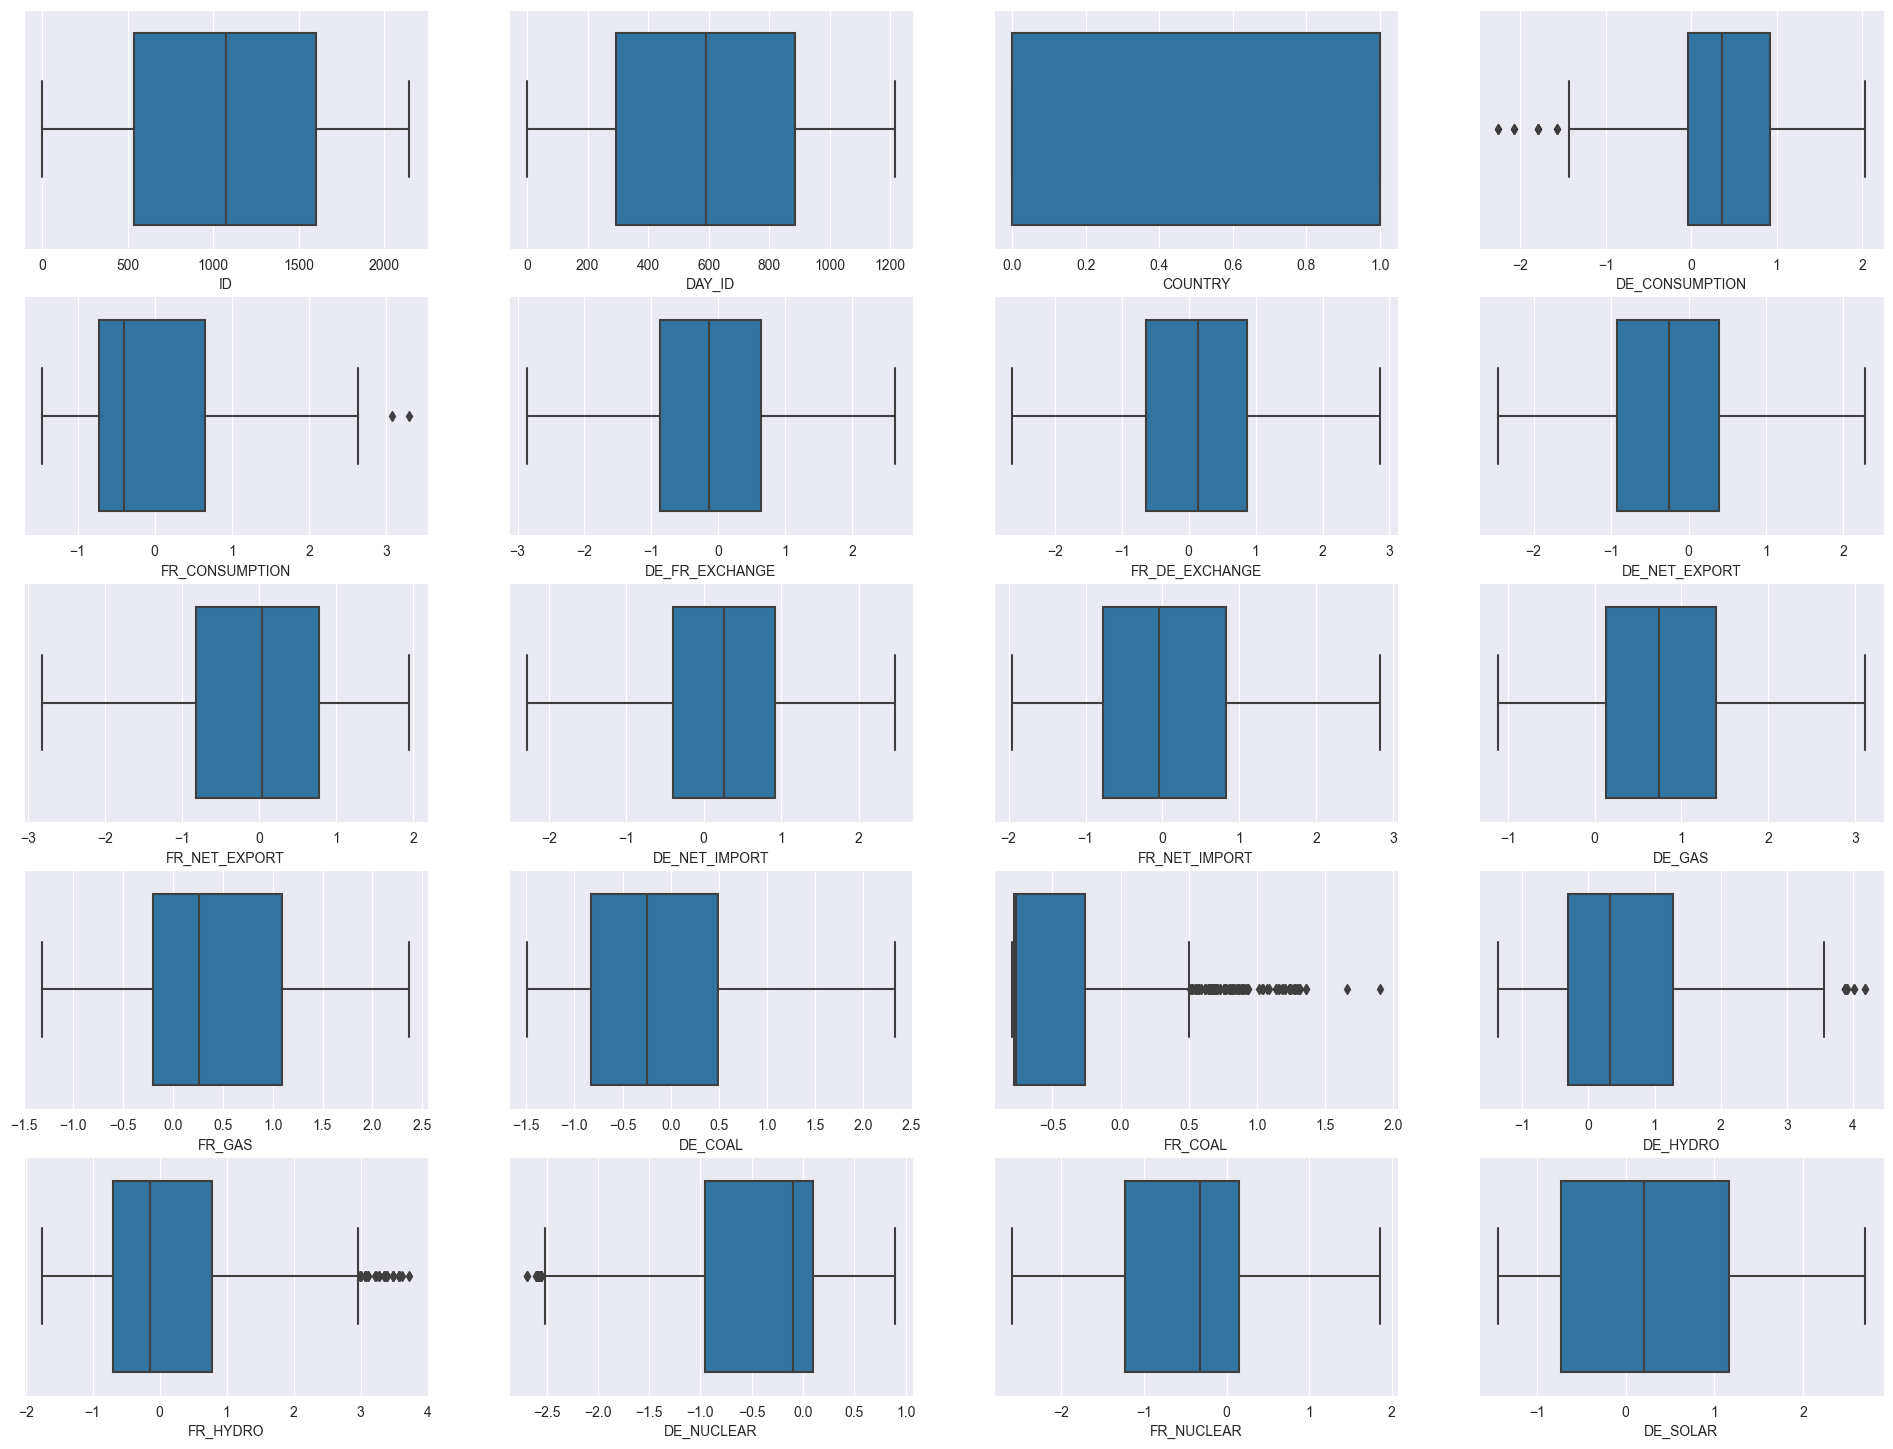

In [45]:
plt.figure(figsize=(8*3, 6*3))
for i, j in enumerate(data_X.describe().columns):
    if i >= 32:
        break
    plt.subplot(5,4, i+1)
    sns.boxplot(x=data_X.loc[:][j])
plt.show()

Affichage des graphiques de dispertion:

ValueError: num must be an integer with 1 <= num <= 20, not 21

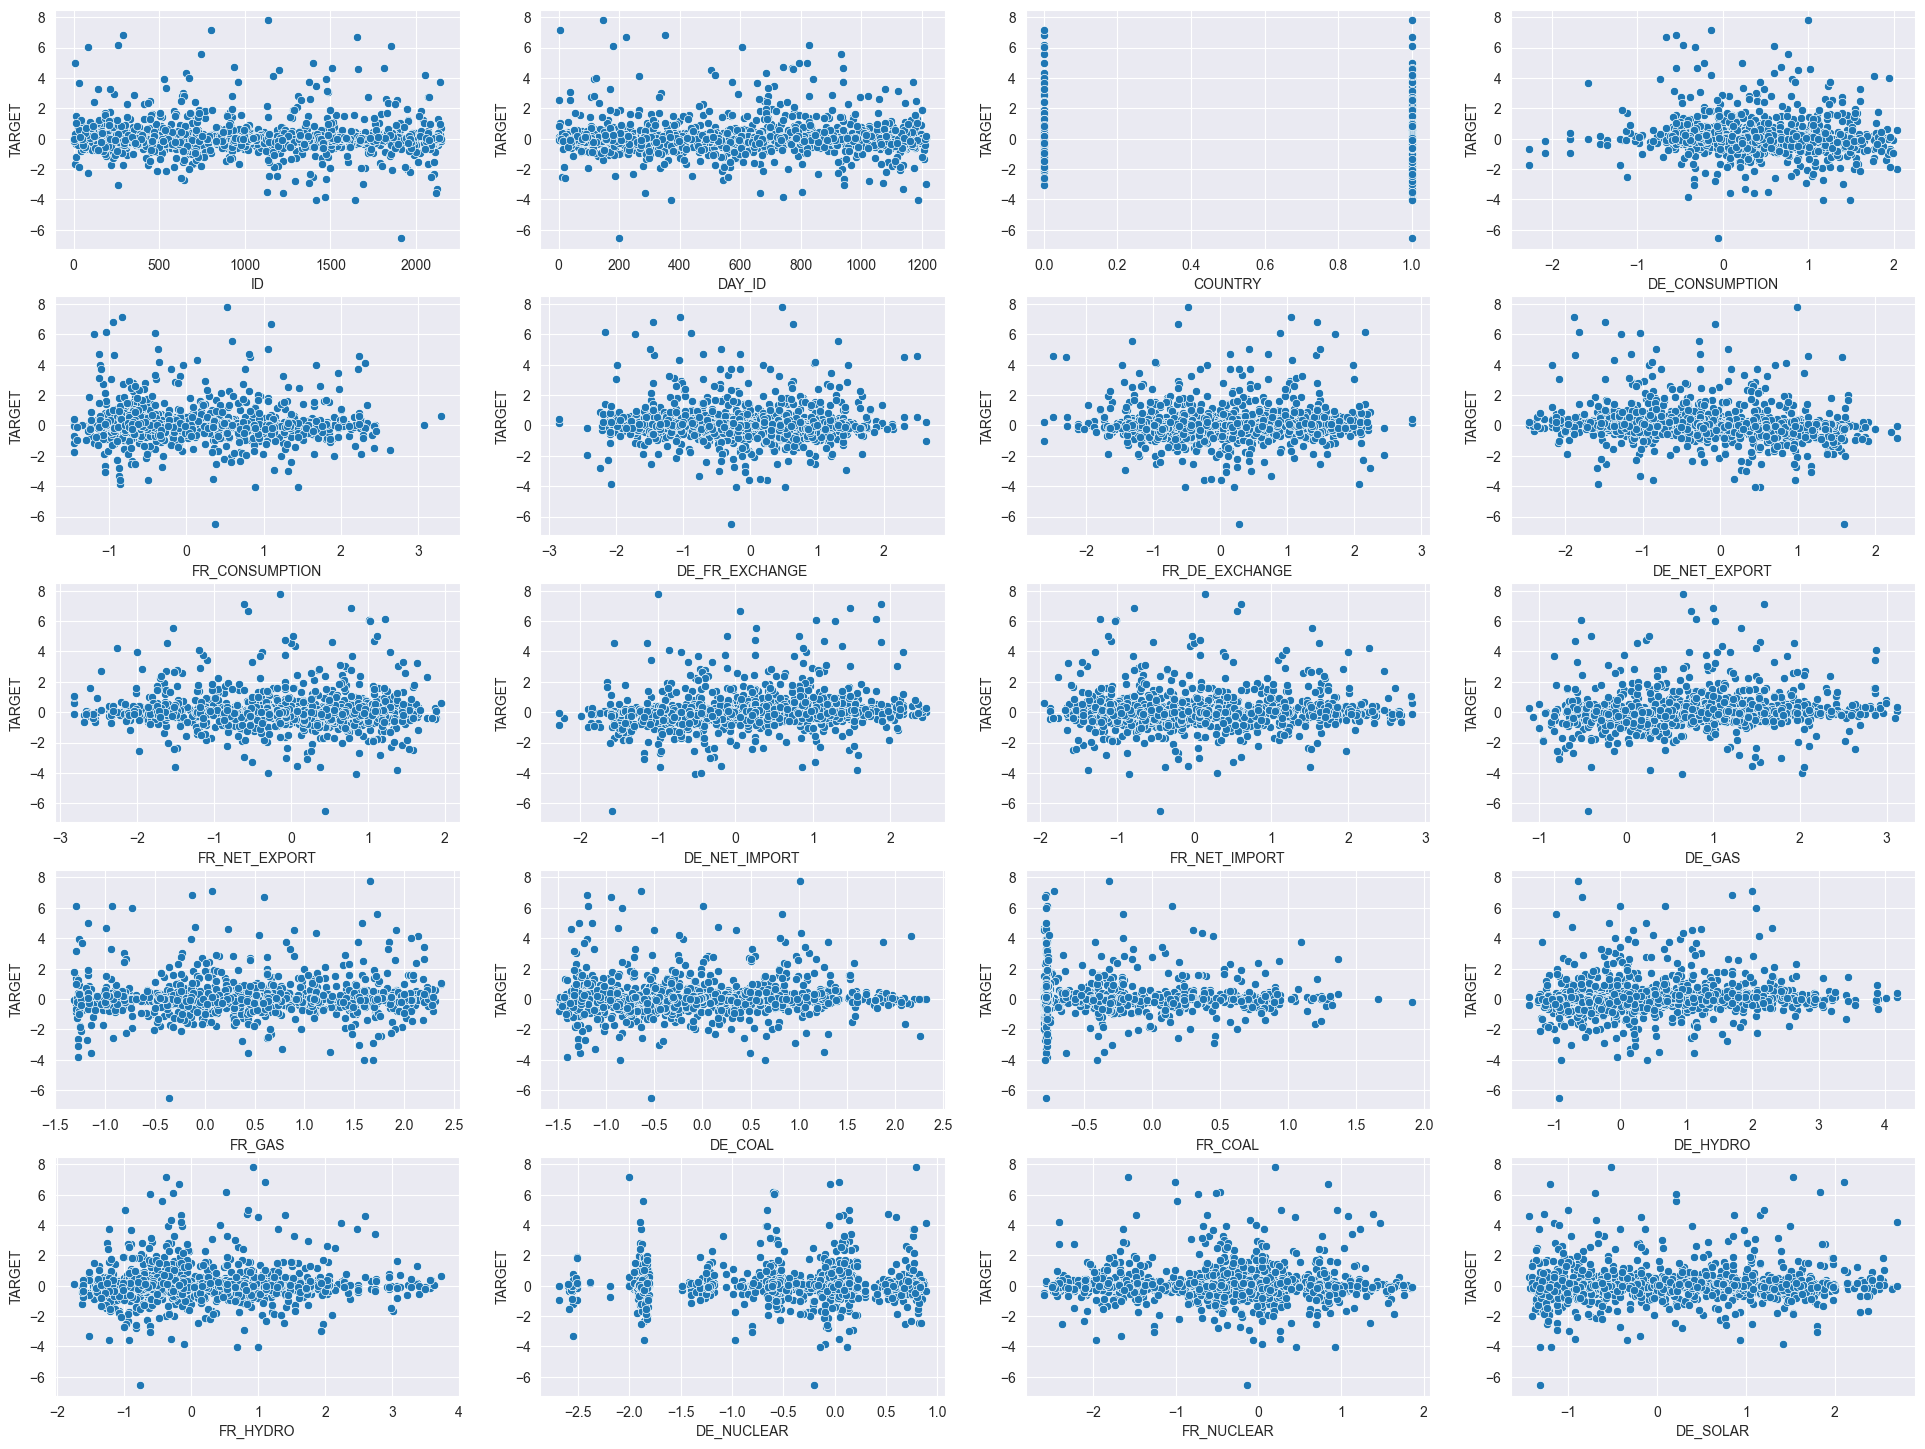

In [44]:
plt.figure(figsize=(8*3, 6*3))
for i, j in enumerate(data_X.describe().columns):
    if i >= 32:
        break
    plt.subplot(5,4, i+1)
    sns.scatterplot(x=data_X[j], y=data_Y.loc[:, 'TARGET'])
plt.show()

Affichage des graphiques de distribution:

C:\Users\aurel\AppData\Local\Temp\ipykernel_15268\3386490300.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data_X[j])
C:\Users\aurel\AppData\Local\Temp\ipykernel_15268\3386490300.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data_X[j])
C:\Users\aurel\AppData\Local\Temp\ipykernel_

ValueError: num must be an integer with 1 <= num <= 15, not 16

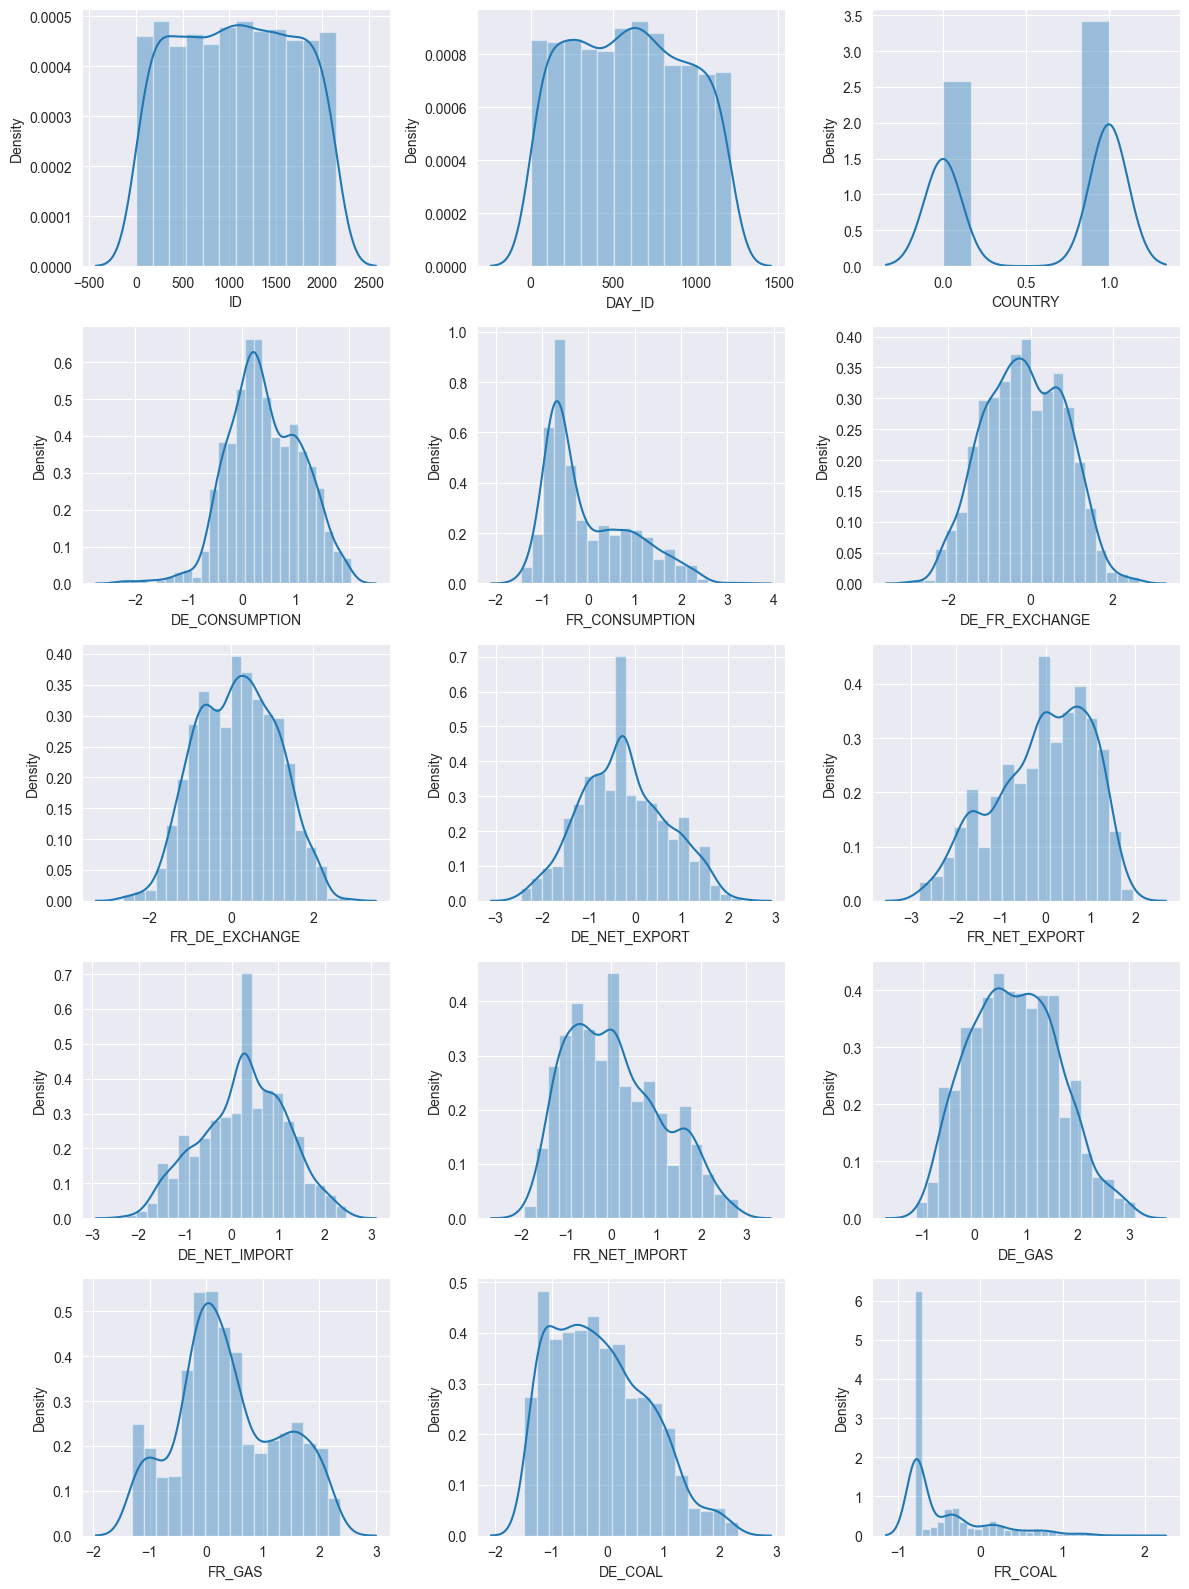

In [49]:
plt.figure(figsize=(12,16))
for i, j in enumerate(data_X.describe().columns):
    plt.subplot(5,3, i+1)
    sns.distplot(x=data_X[j])
    plt.xlabel(j)
    plt.tight_layout()
plt.show()

Régression linéaire:

In [59]:
lin_R = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.1, random_state=42)
lin_R.fit(x_train, y_train)
lin_R.score(x_train, y_train)

print("Score de r^2: ", r2_score(y_test, lin_R.predict(x_test)))
print("Mean Squared Error: ", mean_squared_error(y_train, lin_R.predict(x_train)))

save = pd.DataFrame()
save['ID'] =  new_X["ID"]

rslt = []
for i in range(len(save)):
    rslt.append(lin_R.predict([new_X.iloc[i, :]])[0])


Score de r^2:  0.5040282070922533
Mean Squared Error:  0.5048604576070436


C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression wa

Regression de Ridge:

100%|██████████| 1000/1000 [00:05<00:00, 181.33it/s]


Beta: 523.5711711711712


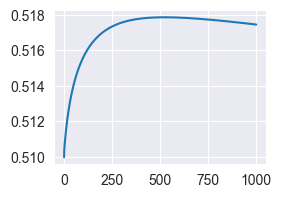

In [63]:
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=42)
rslt_Ridge=[]
lst = np.linspace(0.1, 1000, 1000).tolist()

for beta in tqdm(lst):
    ridge = Ridge(beta).fit(x_train, y_train)
    r2 = r2_score(y_test, ridge.predict(x_test))
    rslt_Ridge.append({'beta': beta, 'r2': r2})

df = DataFrame(rslt_Ridge)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
beta = df.loc[df['r2'].idxmax()]['beta']
print("Beta:", beta)

plt.plot(df['beta'], df['r2'], label='r2')
plt.show()

save['Prediction'] = DataFrame(rslt_Ridge).iloc[:,0]
save.to_csv('Regression_Ridge.csv', index=False)


Zoom ordonnée R2 et abscisse les val de alpha et beta (alpha => lasso / beta => ridge)

100%|██████████| 5000/5000 [00:27<00:00, 184.16it/s]

Best beta: 523.4766953390678


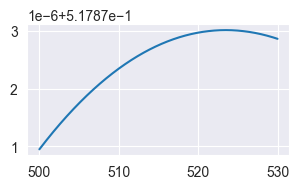

In [62]:
rslt_Ridge=[]
lst = np.linspace(500, 530, 5000).tolist()

for beta in tqdm(lst):
    rid = Ridge(beta).fit(x_train, y_train)
    r2 = r2_score(y_test, rid.predict(x_test))
    rslt_Ridge.append({'beta': beta, 'r2': r2})

df = DataFrame(rslt_Ridge)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
best_beta = df.loc[df['r2'].idxmax()]['beta']
print("Best beta:", best_beta)
plt.plot(df['beta'], df['r2'], label='r2')
plt.tight_layout()
plt.show()

Determnier le nouveau score avec le nouveau coefficient beta:

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=42)
ridge = Ridge(523.4766953390678).fit(x_train, y_train)

save = pd.DataFrame()
save['ID'] = new_X["ID"]

rslt_Ridge = []
for i in range(len(save)):
    rslt_Ridge.append(ridge.predict([new_X.iloc[i, :]])[0])

print("Score de r^2: ", r2_score(y_test, ridge.predict(x_test)))
print("Mean Squared Error: ", mean_squared_error(y_train, ridge.predict(x_train)))


Score de R2:  0.5178730146482817
MSE:  0.5001073266531871


C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\a

Lasso:

100%|██████████| 1000/1000 [00:09<00:00, 110.57it/s]


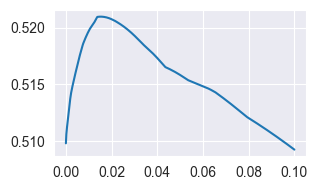

C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\a

Best lambda: 0.015223693693693696
Best null [0 1 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 2 1 2 1]
R2 Score: 0.5209664408318802
Mean Squared Error (Train): 0.49896077074237605


In [29]:
result_lasso = []
lst = np.linspace(0.00001, 0.1,1000).tolist()
for alf in tqdm(lst):
    las = Lasso(alf, max_iter=40000).fit(x_train, y_train)
    r2 = r2_score(y_test, las.predict(x_test))
    result_lasso.append({'lambda':alf, 'r2':r2,'nbnull':sum(las.coef_ ==0)})
df = DataFrame(result_lasso)

plt.figure(figsize = (6,2))
plt.subplot(1,2,1)
plt.plot(df['lambda'], df['r2'], label = 'r2')
plt.tight_layout()
plt.show()

best_lambda = df.loc[df['r2'].idxmax()]['lambda']
best_null = df.loc[df['r2'].idxmax()]['nbnull']
print("Best lambda:", best_lambda)
print("Best null", best_null)
las = Lasso(best_lambda).fit(x_train, y_train)
r = []
for i in range(len(save)):
    r.append(las.predict([new_X.iloc[i, :]])[0])
print("Score de r^2:", r2_score(y_test, las.predict(x_test)))
print("Mean Squared Error: ", mean_squared_error(y_train, las.predict(x_train)))

save['Prediction'] = DataFrame(result_lasso).iloc[:,0]
save.to_csv('Regression_Lasso.csv', index=False)

Zoom sur les valeurs de alpha

100%|██████████| 1000/1000 [00:06<00:00, 153.94it/s]


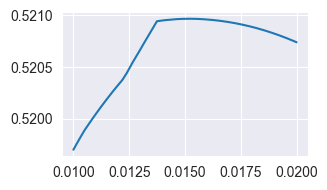

C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\a

Best lambda: 0.015205205205205206
Best null [0 1 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 2 1 2 1]
R2 Score: 0.5209664464153214
Mean Squared Error (Train): 0.498952549957251


In [26]:
result_lasso = []
lst = np.linspace(0.01, 0.02,1000).tolist()
for alf in tqdm(lst):
    las = Lasso(alf, max_iter=40000).fit(x_train, y_train)
    r2 = r2_score(y_test, las.predict(x_test))
    result_lasso.append({'lambda':alf, 'r2':r2,'nbnull':sum(las.coef_ ==0)})
df = DataFrame(result_lasso)

plt.figure(figsize = (6,2))
plt.subplot(1,2,1)
plt.plot(df['lambda'], df['r2'], label = 'r2')
plt.tight_layout()
plt.show()

best_lambda = df.loc[df['r2'].idxmax()]['lambda']
best_null = df.loc[df['r2'].idxmax()]['nbnull']
print("Best lambda:", best_lambda)
print("Best null", best_null)
las = Lasso(best_lambda).fit(x_train, y_train)
r = []
for i in range(len(save)):
    r.append(las.predict([new_X.iloc[i, :]])[0])
print("Score de r^2: ", r2_score(y_test, las.predict(x_test)))
print("Mean Squared Error: ", mean_squared_error(y_train, las.predict(x_train)))

Dernier Zoom pour déterminer la valeur la plus précise de alpha et de r2

100%|██████████| 1000/1000 [00:06<00:00, 165.67it/s]


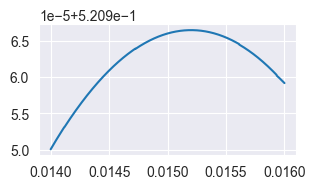

C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\aurel\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\a

Best lambda: 0.0152012012012012
Best null [0 1 2 2 2 1 1 1 2 1 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 2 1 2 1]
R2 Score: 0.5209664465977724
Mean Squared Error (Train): 0.49895077092157597


In [28]:
result_lasso = []
lst = np.linspace(0.014, 0.016,1000).tolist()
for alf in tqdm(lst):
    las = Lasso(alf, max_iter=40000).fit(x_train, y_train)
    r2 = r2_score(y_test, las.predict(x_test))
    result_lasso.append({'lambda':alf, 'r2':r2,'nbnull':sum(las.coef_ ==0)})
df = DataFrame(result_lasso)

plt.figure(figsize = (6,2))
plt.subplot(1,2,1)
plt.plot(df['lambda'], df['r2'], label = 'r2')
plt.tight_layout()
plt.show()

best_lambda = df.loc[df['r2'].idxmax()]['lambda']
best_null = df.loc[df['r2'].idxmax()]['nbnull']
print("Best lambda:", best_lambda)
print("Best null", best_null)
las = Lasso(best_lambda).fit(x_train, y_train)
r = []
for i in range(len(save)):
    r.append(las.predict([new_X.iloc[i, :]])[0])
print("Score de r^2: ", r2_score(y_test, las.predict(x_test)))
print("Mean Squared Error: ", mean_squared_error(y_train, las.predict(x_train)))